In [ ]:
# --- 1.1: Import Libraries ---
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# --- 1.2: Load and Clean the Dataset ---
df = pd.read_csv('/content/drive/MyDrive/df_with_stockcode_rfm.csv')
print(f"Original shape: {df.shape}")

# Drop columns that are no longer needed for modeling
columns_to_drop = ['Quantity', 'InvoiceDate']
df_cleaned = df.drop(columns=columns_to_drop)
print(f"Shape after dropping irrelevant columns: {df_cleaned.shape}")

# --- 1.3: Separate Features (X) and Target (y) ---
y = df_cleaned['IsCancelled']
X = df_cleaned.drop(columns=['IsCancelled'])

# --- 1.4: Split Data into Training and Testing Sets FIRST ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# --- 1.5: Check distribution of target variable in train and test sets ---
print("\nDistribution of 'IsCancelled' in training set:")
print(y_train.value_counts(normalize=True))

Original shape: (12052, 1557)
Shape after dropping irrelevant columns: (12052, 1555)

Training set shape: (9641, 1554)
Testing set shape: (2411, 1554)

Distribution of 'IsCancelled' in training set:
IsCancelled
False    0.532621
True     0.467379
Name: proportion, dtype: float64


In [ ]:
# Identify TF-IDF columns. These are the columns that are not in the original numerical or categorical features.
# We can assume the original engineered features are the ones that were not one-hot encoded from product descriptions.
engineered_features = ['UnitPrice', 'QuantityAbsolute', 'TotalAmount', 'Year', 'Month', 'Day', 'DayOfWeek', 'Hour', 'Recency', 'Frequency', 'Monetary']
all_other_features = [col for col in X_train.columns if col not in engineered_features]

# Separate StockCode and other TF-IDF features
stock_code_columns = ['StockCode']
tfidf_columns = [col for col in all_other_features if col not in stock_code_columns]


# Separate TF-IDF features, StockCode, and other engineered features in training set
X_train_tfidf = X_train[tfidf_columns]
X_train_engineered = X_train[engineered_features]
X_train_stock_code = X_train[stock_code_columns]

# Separate TF-IDF features, StockCode, and other engineered features in testing set
X_test_tfidf = X_test[tfidf_columns]
X_test_engineered = X_test[engineered_features]
X_test_stock_code = X_test[stock_code_columns]


print("Shape of X_train_tfidf:", X_train_tfidf.shape)
print("Shape of X_train_engineered:", X_train_engineered.shape)
print("Shape of X_train_stock_code:", X_train_stock_code.shape)
print("Shape of X_test_tfidf:", X_test_tfidf.shape)
print("Shape of X_test_engineered:", X_test_engineered.shape)
print("Shape of X_test_stock_code:", X_test_stock_code.shape)

Shape of X_train_tfidf: (9641, 1542)
Shape of X_train_engineered: (9641, 11)
Shape of X_train_stock_code: (9641, 1)
Shape of X_test_tfidf: (2411, 1542)
Shape of X_test_engineered: (2411, 11)
Shape of X_test_stock_code: (2411, 1)


In [ ]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training TF-IDF features
scaler.fit(X_train_tfidf)

# Transform both the training and testing TF-IDF features
X_train_tfidf_scaled = scaler.transform(X_train_tfidf)
X_test_tfidf_scaled = scaler.transform(X_test_tfidf)

print("Shape of X_train_tfidf_scaled:", X_train_tfidf_scaled.shape)
print("Shape of X_test_tfidf_scaled:", X_test_tfidf_scaled.shape)

Shape of X_train_tfidf_scaled: (9641, 1542)
Shape of X_test_tfidf_scaled: (2411, 1542)


In [ ]:
# Instantiate PCA
pca = PCA(n_components=50, random_state=42)

# Fit PCA on the scaled training TF-IDF features
pca.fit(X_train_tfidf_scaled)

# Transform both training and testing scaled TF-IDF features
X_train_tfidf_pca = pca.transform(X_train_tfidf_scaled)
X_test_tfidf_pca = pca.transform(X_test_tfidf_scaled)

print("Shape of X_train_tfidf_pca:", X_train_tfidf_pca.shape)
print("Shape of X_test_tfidf_pca:", X_test_tfidf_pca.shape)

Shape of X_train_tfidf_pca: (9641, 50)
Shape of X_test_tfidf_pca: (2411, 50)


In [ ]:
# Convert PCA-transformed arrays to DataFrames, preserving original indices
X_train_tfidf_pca_df = pd.DataFrame(X_train_tfidf_pca, index=X_train_tfidf.index)
X_test_tfidf_pca_df = pd.DataFrame(X_test_tfidf_pca, index=X_test_tfidf.index)

# Concatenate engineered features, StockCode, and PCA-transformed TF-IDF features for training set
X_train_combined = pd.concat([X_train_engineered, X_train_stock_code, X_train_tfidf_pca_df], axis=1)

# Concatenate engineered features, StockCode, and PCA-transformed TF-IDF features for testing set
X_test_combined = pd.concat([X_test_engineered, X_test_stock_code, X_test_tfidf_pca_df], axis=1)

# Print the shapes of the combined dataframes
print("Shape of X_train_combined:", X_train_combined.shape)
print("Shape of X_test_combined:", X_test_combined.shape)

# Display columns of X_train_combined to check for 'StockCode'
print("\nColumns of X_train_combined:")
print(X_train_combined.columns.tolist())

Shape of X_train_combined: (9641, 62)
Shape of X_test_combined: (2411, 62)

Columns of X_train_combined:
['UnitPrice', 'QuantityAbsolute', 'TotalAmount', 'Year', 'Month', 'Day', 'DayOfWeek', 'Hour', 'Recency', 'Frequency', 'Monetary', 'StockCode', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Parameter grid for Decision Tree
param_grid_dt = {
    'estimator__criterion': ['gini', 'entropy'],
    'estimator__max_depth': [10, 15, 20],
    'estimator__min_samples_split': [2, 5, 10]
}

# Identify the categorical column for encoding
categorical_features = ['StockCode']
# Identify the numerical columns (all other columns)
numerical_features = [col for col in X_train_combined.columns if col not in categorical_features]


# Create a ColumnTransformer to apply one-hot encoding to 'StockCode' and pass through numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numerical_features)
    ],
    remainder='passthrough' # Keep any other columns not specified (shouldn't be any in this case)
)

# Create a pipeline that first preprocesses the data and then applies the Decision Tree classifier
pipeline_dt = Pipeline(steps=[('preprocessor', preprocessor),
                              ('estimator', DecisionTreeClassifier(random_state=42))])


# Instantiate GridSearchCV for Decision Tree
grid_search_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=5, scoring='roc_auc', n_jobs=-1)

# Perform grid search on the training data for Decision Tree
print("Performing Grid Search for Decision Tree...")
# No need to convert column names to strings anymore as ColumnTransformer handles this
grid_search_dt.fit(X_train_combined, y_train)
print("Decision Tree Grid Search Complete.")

# Print the best parameters and best score for Decision Tree
print("\nBest parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best ROC AUC score on training data (Decision Tree):", grid_search_dt.best_score_)

# Get the best model from grid search
best_dt_model = grid_search_dt.best_estimator_

# Evaluate Best Decision Tree Model
print("\n--- Best Decision Tree Model Evaluation ---")
y_pred_dt = best_dt_model.predict(X_test_combined)
y_proba_dt = best_dt_model.predict_proba(X_test_combined)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

print("ROC AUC Score:", roc_auc_score(y_test, y_proba_dt))
print("Average Precision Score:", average_precision_score(y_test, y_proba_dt))
print("Accuracy Score:", accuracy_score(y_test, y_pred_dt))

Performing Grid Search for Decision Tree...
Decision Tree Grid Search Complete.

Best parameters for Decision Tree: {'estimator__criterion': 'entropy', 'estimator__max_depth': 10, 'estimator__min_samples_split': 10}
Best ROC AUC score on training data (Decision Tree): 0.8275274799061446

--- Best Decision Tree Model Evaluation ---
Classification Report:
              precision    recall  f1-score   support

       False       0.79      0.81      0.80      1284
        True       0.78      0.76      0.77      1127

    accuracy                           0.79      2411
   macro avg       0.79      0.79      0.79      2411
weighted avg       0.79      0.79      0.79      2411

Confusion Matrix:
[[1043  241]
 [ 270  857]]
ROC AUC Score: 0.8487341299786879
Average Precision Score: 0.7952428396056963
Accuracy Score: 0.7880547490667773


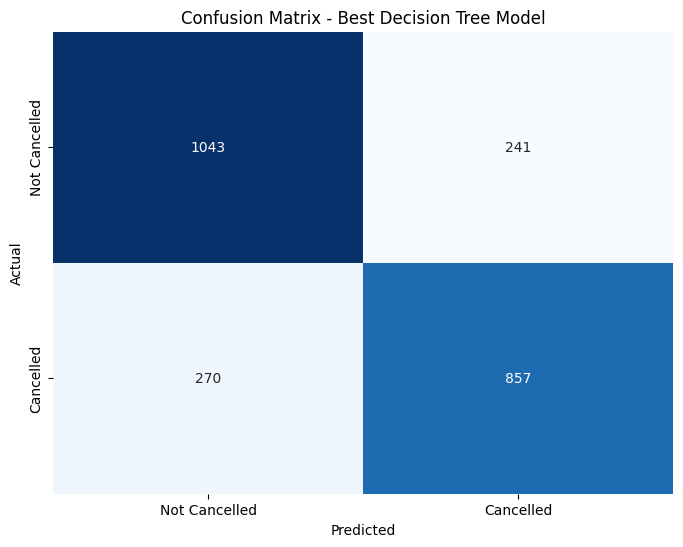

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix for the best Decision Tree model on the test set
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Cancelled', 'Cancelled'],
            yticklabels=['Not Cancelled', 'Cancelled'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Best Decision Tree Model')
plt.show()

In [ ]:
# Function to evaluate model on both train and test sets and print results
def evaluate_model_overfitting(model, X_train, y_train, X_test, y_test, model_name):
    print(f"\n--- {model_name} Overfitting Check ---")

    # Evaluate on Training Set
    y_pred_train = model.predict(X_train)
    y_proba_train = model.predict_proba(X_train)[:, 1]

    print(f"\n{model_name} - Training Set Evaluation:")
    print("Classification Report:")
    print(classification_report(y_train, y_pred_train))
    print("ROC AUC Score:", roc_auc_score(y_train, y_proba_train))
    print("Accuracy Score:", accuracy_score(y_train, y_pred_train))

    # Evaluate on Testing Set
    y_pred_test = model.predict(X_test)
    y_proba_test = model.predict_proba(X_test)[:, 1]

    print(f"\n{model_name} - Testing Set Evaluation:")
    print("Classification Report:")
    print(classification_report(y_test, y_pred_test))
    print("ROC AUC Score:", roc_auc_score(y_test, y_proba_test))
    print("Accuracy Score:", accuracy_score(y_test, y_pred_test))

# Convert column names to strings for evaluation (already done in the previous cell, but good to be safe)
X_train_combined.columns = X_train_combined.columns.astype(str)
X_test_combined.columns = X_test_combined.columns.astype(str)

# Evaluate Decision Tree for overfitting using the best fitted model
evaluate_model_overfitting(best_dt_model, X_train_combined, y_train, X_test_combined, y_test, "Decision Tree")



--- Decision Tree Overfitting Check ---

Decision Tree - Training Set Evaluation:
Classification Report:
              precision    recall  f1-score   support

       False       0.85      0.88      0.87      5135
        True       0.86      0.83      0.84      4506

    accuracy                           0.86      9641
   macro avg       0.86      0.86      0.86      9641
weighted avg       0.86      0.86      0.86      9641

ROC AUC Score: 0.9406285938774266
Accuracy Score: 0.8573799398402655

Decision Tree - Testing Set Evaluation:
Classification Report:
              precision    recall  f1-score   support

       False       0.79      0.81      0.80      1284
        True       0.78      0.76      0.77      1127

    accuracy                           0.79      2411
   macro avg       0.79      0.79      0.79      2411
weighted avg       0.79      0.79      0.79      2411

ROC AUC Score: 0.8487341299786879
Accuracy Score: 0.7880547490667773



--- ROC Curve for Best Decision Tree ---


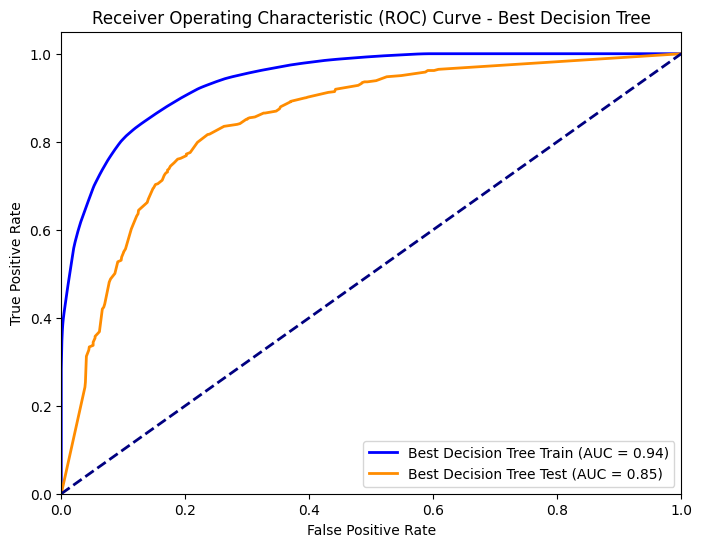

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Function to plot ROC curve
def plot_roc_curve(model, X_train, y_train, X_test, y_test, model_name):
    print(f"\n--- ROC Curve for {model_name} ---")

    # Predict probabilities
    y_proba_train = model.predict_proba(X_train)[:, 1]
    y_proba_test = model.predict_proba(X_test)[:, 1]

    # Calculate ROC curve
    fpr_train, tpr_train, _ = roc_curve(y_train, y_proba_train)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_proba_test)

    # Calculate AUC
    roc_auc_train = auc(fpr_train, tpr_train)
    roc_auc_test = auc(fpr_test, tpr_test)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'{model_name} Train (AUC = {roc_auc_train:.2f})')
    plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'{model_name} Test (AUC = {roc_auc_test:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Convert column names to strings for plotting (already done in previous cells, but good to be safe)
X_train_combined.columns = X_train_combined.columns.astype(str)
X_test_combined.columns = X_test_combined.columns.astype(str)

# Plot ROC curve for Best Decision Tree model
plot_roc_curve(best_dt_model, X_train_combined, y_train, X_test_combined, y_test, "Best Decision Tree")

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score, accuracy_score


# Parameter grid for Random Forest (using the one provided for regularization)
param_grid_rf_regularized = {
    'estimator__n_estimators': [100, 200],
    'estimator__max_depth': [5, 8, 10],  # Using smaller values to prevent deep trees
    'estimator__min_samples_split': [10, 20, 40] # Requiring more samples to split
}

# Identify the categorical column for encoding
categorical_features = ['StockCode']
# Identify the numerical columns (all other columns)
numerical_features = [col for col in X_train_combined.columns if col not in categorical_features]

# Create a ColumnTransformer to apply one-hot encoding to 'StockCode' and pass through numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numerical_features)
    ],
    remainder='passthrough' # Keep any other columns not specified (shouldn't be any in this case)
)

# Create a pipeline that first preprocesses the data and then applies the Random Forest classifier
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('estimator', RandomForestClassifier(random_state=42))])


# Instantiate GridSearchCV
grid_search_rf_regularized = GridSearchCV(pipeline_rf, param_grid_rf_regularized, cv=5, scoring='roc_auc', n_jobs=-1)

# Perform grid search on the training data
print("Performing Grid Search for Regularized Random Forest...")
grid_search_rf_regularized.fit(X_train_combined, y_train)
print("Grid Search Complete.")

# Print the best parameters and best score
print("\nBest parameters for Regularized Random Forest:", grid_search_rf_regularized.best_params_)
print("Best ROC AUC score on training data:", grid_search_rf_regularized.best_score_)

# Evaluate the best model on the test set
best_rf_model_regularized = grid_search_rf_regularized.best_estimator_
y_pred_rf_regularized = best_rf_model_regularized.predict(X_test_combined)
y_proba_rf_regularized = best_rf_model_regularized.predict_proba(X_test_combined)[:, 1]

print("\n--- Regularized Random Forest Model Evaluation on Test Set ---")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf_regularized))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_regularized))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_rf_regularized))
print("Average Precision Score:", average_precision_score(y_test, y_proba_rf_regularized))
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf_regularized))

Performing Grid Search for Regularized Random Forest...
Grid Search Complete.

Best parameters for Regularized Random Forest: {'estimator__max_depth': 10, 'estimator__min_samples_split': 10, 'estimator__n_estimators': 200}
Best ROC AUC score on training data: 0.8325466456962489

--- Regularized Random Forest Model Evaluation on Test Set ---
Classification Report:
              precision    recall  f1-score   support

       False       0.73      0.87      0.79      1284
        True       0.81      0.63      0.71      1127

    accuracy                           0.76      2411
   macro avg       0.77      0.75      0.75      2411
weighted avg       0.77      0.76      0.75      2411

Confusion Matrix:
[[1118  166]
 [ 420  707]]
ROC AUC Score: 0.845657564122764
Average Precision Score: 0.8175618863298904
Accuracy Score: 0.7569473247615097


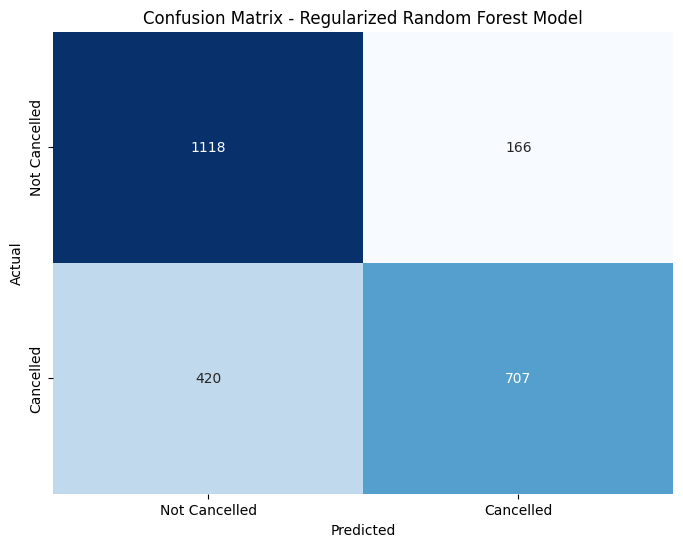

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix for the Regularized Random Forest model on the test set
# Assuming y_test and y_pred_rf_regularized are available from previous cells
cm_rf = confusion_matrix(y_test, y_pred_rf_regularized)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Cancelled', 'Cancelled'],
            yticklabels=['Not Cancelled', 'Cancelled'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Regularized Random Forest Model')
plt.show()

Training Tuned Random Forest Model...
Tuned Random Forest Model Training Complete.

Training Tuned Decision Tree Model...
Tuned Decision Tree Model Training Complete.

--- ROC Curve for Tuned Decision Tree ---


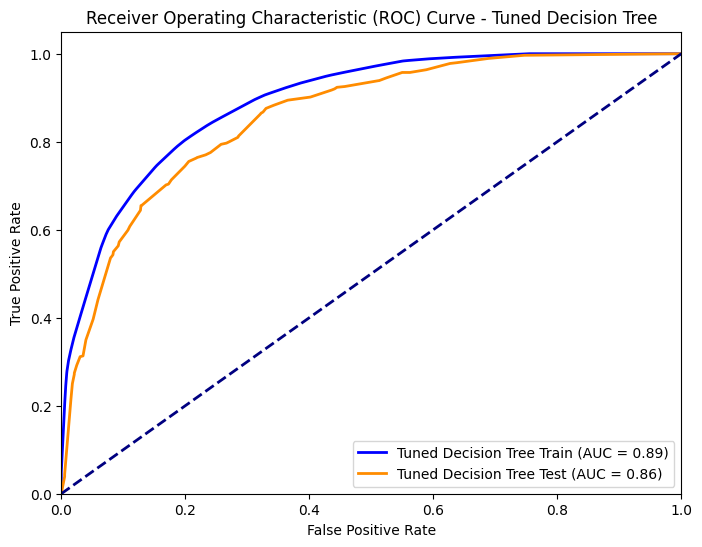


--- ROC Curve for Tuned Random Forest ---


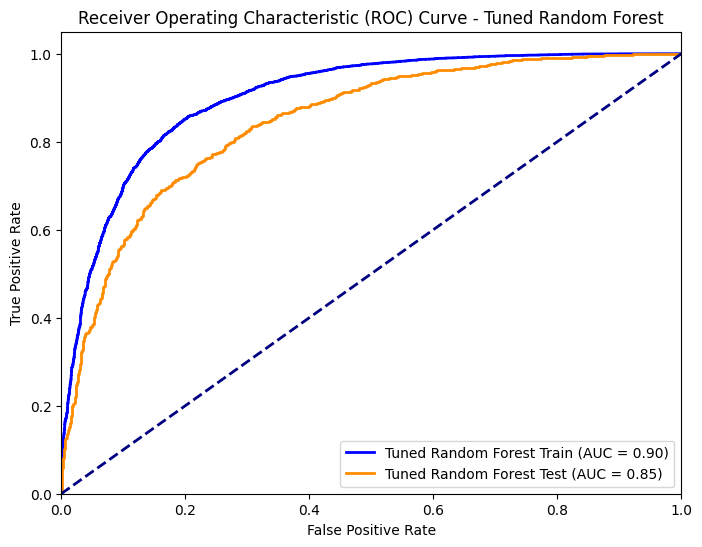

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Best parameters provided by the user or found from grid search
best_rf_params_tuned = {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200} # Assuming these are the best from a previous grid search
best_dt_params_tuned = {'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 60} # Assuming these are the best from a previous grid search

# Identify the categorical column for encoding
categorical_features = ['StockCode']
# Identify the numerical columns (all other columns)
numerical_features = [col for col in X_train_combined.columns if col not in categorical_features]

# Create a ColumnTransformer to apply one-hot encoding to 'StockCode' and pass through numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numerical_features)
    ],
    remainder='passthrough' # Keep any other columns not specified (shouldn't be any in this case)
)

# Create pipelines for the tuned models
rf_model_tuned = Pipeline(steps=[('preprocessor', preprocessor),
                              ('estimator', RandomForestClassifier(**best_rf_params_tuned, random_state=42))])

dt_model_tuned = Pipeline(steps=[('preprocessor', preprocessor),
                              ('estimator', DecisionTreeClassifier(**best_dt_params_tuned, random_state=42))])


# Train the models on the combined training data
print("Training Tuned Random Forest Model...")
rf_model_tuned.fit(X_train_combined, y_train)
print("Tuned Random Forest Model Training Complete.")

print("\nTraining Tuned Decision Tree Model...")
dt_model_tuned.fit(X_train_combined, y_train)
print("Tuned Decision Tree Model Training Complete.")

# Assign the trained models to variables used by the plotting function
best_rf_model = rf_model_tuned
best_dt_model = dt_model_tuned

# Function to evaluate model on both train and test sets and print results (keeping this for potential future use or context)
def evaluate_model_overfitting_f1(model, X_train, y_train, X_test, y_test, model_name):
    print(f"\n--- {model_name} Overfitting Check (F1 Score and other metrics) ---")

    # Evaluate on Training Set
    y_pred_train = model.predict(X_train)
    y_proba_train = model.predict_proba(X_train)[:, 1]

    print(f"\n{model_name} - Training Set Evaluation:")
    print("Classification Report:")
    print(classification_report(y_train, y_pred_train))
    print("ROC AUC Score:", roc_auc_score(y_train, y_proba_train))
    print("Accuracy Score:", accuracy_score(y_train, y_pred_train))


    # Evaluate on Testing Set
    y_pred_test = model.predict(X_test)
    y_proba_test = model.predict_proba(X_test)[:, 1]

    print(f"\n{model_name} - Testing Set Evaluation:")
    print("Classification Report:")
    print(classification_report(y_test, y_pred_test))
    print("ROC AUC Score:", roc_auc_score(y_test, y_proba_test))
    print("Accuracy Score:", accuracy_score(y_test, y_pred_test))



# --- Draw ROC curves ---
X_train_combined.columns = X_train_combined.columns.astype(str)
X_test_combined.columns = X_test_combined.columns.astype(str)

# Plot ROC curve for Tuned Decision Tree model
plot_roc_curve(best_dt_model, X_train_combined, y_train, X_test_combined, y_test, "Tuned Decision Tree")

# Plot ROC curve for Tuned Random Forest model
plot_roc_curve(best_rf_model, X_train_combined, y_train, X_test_combined, y_test, "Tuned Random Forest")

--- Performance Comparison (Training vs. Original Test) ---

Decision Tree:
  F1 Score (Training): 0.7885
  ROC AUC Score (Training): 0.8900
  F1 Score (Original Test): 0.7591
  ROC AUC Score (Original Test): 0.8564

Random Forest:
  F1 Score (Training): 0.7771
  ROC AUC Score (Training): 0.9017
  F1 Score (Original Test): 0.7070
  ROC AUC Score (Original Test): 0.8457

--- ROC Curve for Tuned Decision Tree (Training vs. Original Test) ---


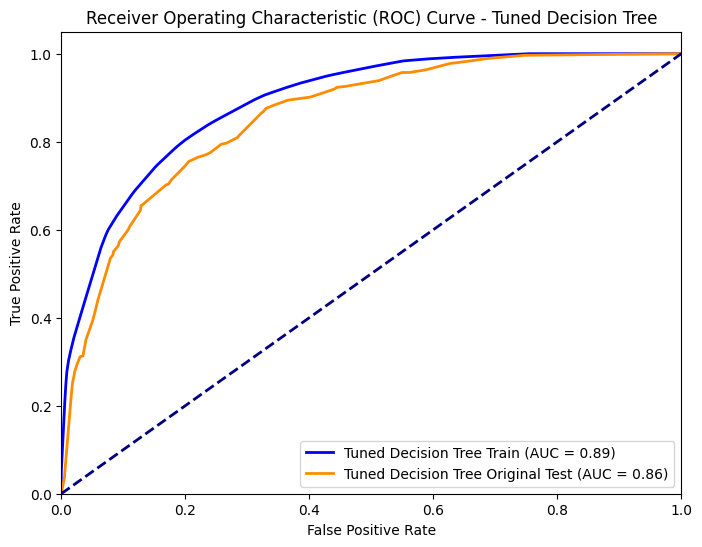


--- ROC Curve for Tuned Regularized Random Forest (Training vs. Original Test) ---


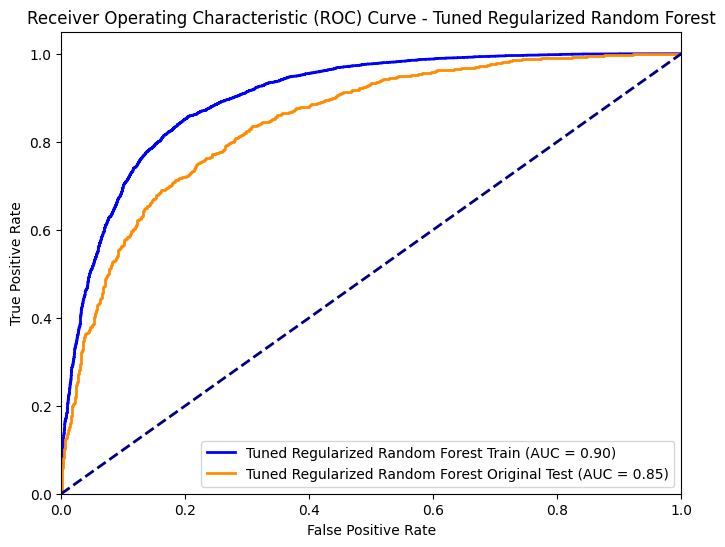

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, f1_score, roc_curve, auc


# Convert column names to strings for evaluation
X_train_combined.columns = X_train_combined.columns.astype(str)
X_test_combined.columns = X_test_combined.columns.astype(str)


print("--- Performance Comparison (Training vs. Original Test) ---")

# Decision Tree Evaluation
print("\nDecision Tree:")
# Evaluate on Training Set
y_pred_dt_train = best_dt_model.predict(X_train_combined)
y_proba_dt_train = best_dt_model.predict_proba(X_train_combined)[:, 1]
f1_dt_train = f1_score(y_train, y_pred_dt_train)
roc_auc_dt_train = roc_auc_score(y_train, y_proba_dt_train)
print(f"  F1 Score (Training): {f1_dt_train:.4f}")
print(f"  ROC AUC Score (Training): {roc_auc_dt_train:.4f}")

# Evaluate on Original Test Set
y_pred_dt_test = best_dt_model.predict(X_test_combined)
y_proba_dt_test = best_dt_model.predict_proba(X_test_combined)[:, 1]
f1_dt_test = f1_score(y_test, y_pred_dt_test)
roc_auc_dt_test = roc_auc_score(y_test, y_proba_dt_test)
print(f"  F1 Score (Original Test): {f1_dt_test:.4f}")
print(f"  ROC AUC Score (Original Test): {roc_auc_dt_test:.4f}")


# Random Forest Evaluation
print("\nRandom Forest:")
# Evaluate on Training Set
y_pred_rf_train = best_rf_model_regularized.predict(X_train_combined)
y_proba_rf_train = best_rf_model_regularized.predict_proba(X_train_combined)[:, 1]
f1_rf_train = f1_score(y_train, y_pred_rf_train)
roc_auc_rf_train = roc_auc_score(y_train, y_proba_rf_train)
print(f"  F1 Score (Training): {f1_rf_train:.4f}")
print(f"  ROC AUC Score (Training): {roc_auc_rf_train:.4f}")

# Evaluate on Original Test Set
y_pred_rf_test = best_rf_model_regularized.predict(X_test_combined)
y_proba_rf_test = best_rf_model_regularized.predict_proba(X_test_combined)[:, 1]
f1_rf_test = f1_score(y_test, y_pred_rf_test)
roc_auc_rf_test = roc_auc_score(y_test, y_proba_rf_test)
print(f"  F1 Score (Original Test): {f1_rf_test:.4f}")
print(f"  ROC AUC Score (Original Test): {roc_auc_rf_test:.4f}")


# --- Plot ROC curves ---

# Function to plot ROC curve
def plot_roc_curve(model, X_train, y_train, X_test, y_test, model_name):
    print(f"\n--- ROC Curve for {model_name} (Training vs. Original Test) ---")

    # Predict probabilities
    y_proba_train = model.predict_proba(X_train)[:, 1]
    y_proba_test = model.predict_proba(X_test)[:, 1]

    # Calculate ROC curve
    fpr_train, tpr_train, _ = roc_curve(y_train, y_proba_train)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_proba_test)

    # Calculate AUC
    roc_auc_train = auc(fpr_train, tpr_train)
    roc_auc_test = auc(fpr_test, tpr_test)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'{model_name} Train (AUC = {roc_auc_train:.2f})')
    plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'{model_name} Original Test (AUC = {roc_auc_test:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC curve for Tuned Decision Tree model
plot_roc_curve(best_dt_model, X_train_combined, y_train, X_test_combined, y_test, "Tuned Decision Tree")

# Plot ROC curve for Tuned Regularized Random Forest model
plot_roc_curve(best_rf_model_regularized, X_train_combined, y_train, X_test_combined, y_test, "Tuned Regularized Random Forest")